In [3]:
#from abc import ABCMeta, abstractmethod
import matplotlib.pyplot as plot
import random


class Creature():
    def __init__(self, species):
        self.pos_x = 0
        self.pos_y = 0
        self.old_pos_x = 0
        self.old_pos_y = 0
        self.species = species
        
    def randomSpawn(self, size):
        self.pos_x = random.randrange(0, size)
        self.pos_y = random.randrange(0, size)
        
    def spawn(self, x, y):
        self.pos_x = x
        self.pos_y = y
        
    def randomWalk(self, size):
        y = random.choice([-1, 0, 1])
        x = random.choice([-1, 0, 1])
        
        self.old_pos_x = self.pos_x
        self.old_pos_y = self.pos_y
        
        if (self.old_pos_x + x) < 0:
            x = random.choice([0, 1])
        elif (self.old_pos_x + x) > size - 1:
            x = random.choice([0, -1])
            
        if (self.old_pos_y + y) < 0:
            y = random.choice([0, 1])
        elif (self.old_pos_y + y) > size - 1:
            y = random.choice([0, -1])
            
        self.pos_x = self.old_pos_x + x
        self.pos_y = self.old_pos_y + y
        
    def notExist(self):
        self.species = -1
    
    def getSpecies(self):
        return self.species
        
    def getPosition(self):
        position = [self.pos_x, self.pos_y]
        return position
    
    def getPosX(self):
        return self.pos_x
    
    def getPosY(self):
        return self.pos_y
    
    def getOldPosX(self):
        return self.old_pos_x
    
    def getOldPosY(self):
        return self.old_pos_y
        
        
# Creature class end
# ----------------------------------------------------------------


class Environment():
    
    def __init__(self, size):
        # initialize the ecosystem
        self.ENV = []
        self.size = size

        # setting up empty environment
        for i in range(0, self.size):
            self.ENV.append([0]*(self.size))
            
    def generateRiver(self, river_col):
        
        for i in range(0, self.size):
            if (river_col - 1) < 0:
                river_col = 1
            if (river_col + 1) > self.size - 1:
                river_col = self.size - 2
            
            self.ENV[i][river_col - 1] = round(random.uniform(0.9, 1.1), 1)
            self.ENV[i][river_col] = round(random.uniform(0.9, 1.1), 1)
            self.ENV[i][river_col + 1] = round(random.uniform(0.9, 1.1), 1)
            
            r_curve = random.choice([-1, 0, 1])
            river_col += r_curve
    
    # legacy
    def generateBears(self, rarity = 64):
        bear = 3
        for i in range(0, self.size):
            for j in range(0, self.size):
                spawnlist = [True] + [False]*rarity
                spawn = random.choice(spawnlist)
                if (self.ENV[i][j] == 0) & spawn:
                    self.ENV[i][j] = bear
    
    # legacy
    def generateFish(self, rarity = 4):
        fish = 2
        for i in range(0, self.size):
            for j in range(0, self.size):
                spawnlist = [True] + [False]*rarity
                spawn = random.choice(spawnlist)
                if (0.9 <= self.ENV[i][j] <= 1.1) & spawn:
                    self.ENV[i][j] = fish
                    
    
    def editPositionValue(self, row, column, variable):
        self.ENV[row][column] = variable
        
    def getPositionValue(self, row, column):
        return self.ENV[row][column]
            
    def showEnvironment(self):
        fig = plot.figure(frameon=False)
        im = plot.imshow(self.ENV, cmap='Blues')
        
        plot.axis('off')
        plot.show()
    
    def showEnvironmentValues(self):
        for i in range(0, self.size):
            print(self.ENV[i])


# Environment class end
# ----------------------------------------------------------------

size = 32
bear = 3
fish = 2
fish_amount = 30
bear_amount = 20


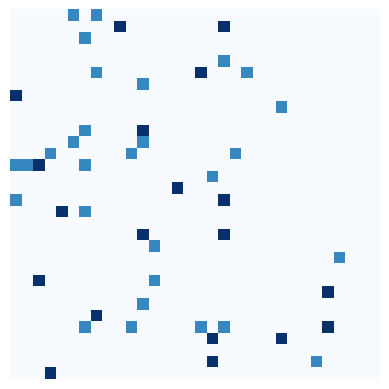

In [29]:
# rework in progress

ENV = Environment(size)
Fish = [Creature(fish) for i in range(fish_amount)]
Bear = [Creature(bear) for i in range(bear_amount)]

#ENV.generateBears()
for i in range(0, bear_amount):
    Bear[i].randomSpawn(size)
    
for b in range(0, bear_amount):
    for i in range(0, size):
        for j in range(0, size):
            if (i == Bear[b].getPosX()) & (j == Bear[b].getPosY()):
                ENV.editPositionValue(i, j, bear)

#ENV.generateFish()
for i in range(0, fish_amount):
    Fish[i].randomSpawn(size)
    
for f in range(0, fish_amount):
    for i in range(0, size):
        for j in range(0, size):
            if (i == Fish[f].getPosX()) & (j == Fish[f].getPosY()):
                ENV.editPositionValue(i, j, fish)
                

ENV.showEnvironment()
#ENV.showEnvironmentValues()

Fish population: 30
Bear population: 20


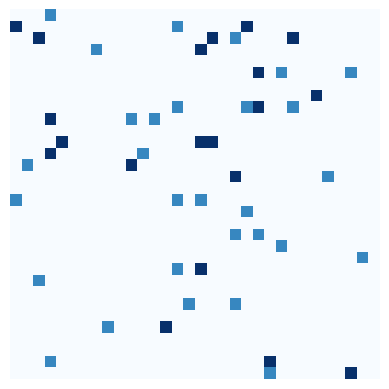

In [13]:
# rework in progress ---------------------------------------------

# Fish walking
for i in range(0, fish_amount):
    Fish[i].randomWalk(size)

for f in range(0, fish_amount):
    for i in range(0, size):
        for j in range(0, size):
            if (i == Fish[f].getPosX()) & (j == Fish[f].getPosY()):
                ENV.editPositionValue(Fish[f].getOldPosX(), Fish[f].getOldPosY(), 0)
                ENV.editPositionValue(i, j, Fish[f].getSpecies())
                # debug
                #print("Fish number:", f)
                #print(Fish[f].getPosition(), Fish[f].getSpecies())


# Bear walking
for i in range(0, bear_amount):
    Bear[i].randomWalk(size)

for b in range(0, bear_amount):
    for i in range(0, size):
        for j in range(0, size):
            if (i == Bear[b].getPosX()) & (j == Bear[b].getPosY()):
                ENV.editPositionValue(Bear[b].getOldPosX(), Bear[b].getOldPosY(), 0)    
                ENV.editPositionValue(i, j, Bear[b].getSpecies())


# Bear eating fish
for b in range(0, bear_amount):
    for f in range(0, fish_amount):
        if Bear[b].getPosition() == Fish[f].getPosition():
            Fish[f].notExist()

delete = 0
for f in range(fish_amount - 1, -1, -1):
    if Fish[f].getSpecies() != fish:
        del Fish[f]
        delete = delete + 1
        
if delete > 0:
    fish_amount = fish_amount - delete
    # debug
    #print("Deletion happened. Lost amount:", delete)
    

# visualization ("ctrl + enter" to walk)
print("Fish population:", len(Fish))
print("Bear population:", len(Bear))
ENV.showEnvironment()

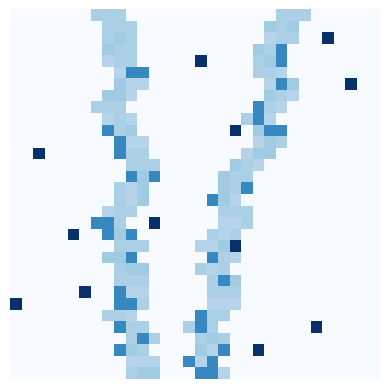

In [4]:
#generation for fun
VNE = Environment(size)

VNE.generateRiver(8)
VNE.generateRiver(24)

VNE.generateBears()
VNE.generateFish()

VNE.showEnvironment()
#VNE.showEnvironmentValues()

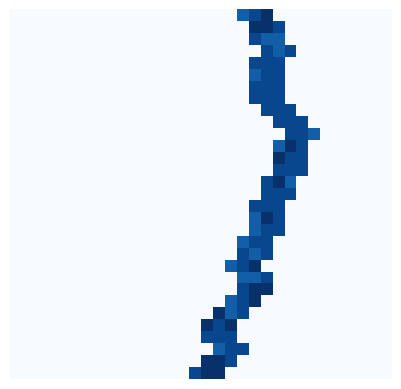

In [11]:
# legacy code

ENV = []
env_size = 31

# setting up empty environment
for i in range(0, env_size):
    ENV.append([0]*(env_size+1))
    #print(A[i])
    
# generating random river
import random
rmin = 2
rmax = env_size - rmin
river_col = random.randint(rmin, rmax)

for i in range(0, env_size):
    if river_col-1 < 0:
        river_col = 1
    if river_col+1 > env_size:
        river_col = env_size - 1
    
    ENV[i][river_col - 1] = round(random.uniform(0.9, 1.1), 1)
    ENV[i][river_col] = round(random.uniform(0.9, 1.1), 1)
    ENV[i][river_col + 1] = round(random.uniform(0.9, 1.1), 1)
    
    r_curve = random.choice([-1, 0, 1])
    river_col += r_curve

import matplotlib.pyplot as plt
fig = plt.figure(frameon=False)
im = plt.imshow(ENV, cmap='Blues')
plt.axis('off')
plt.show()